https://adrianogilardone.com/analisi-delle-componenti-principali/

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
#just import the useful libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import linalg as la

fill with normal distributed numbers
https://www.appsloveworld.com/pandas/100/124/populate-pandas-dataframe-with-normal-distribution

In [2]:
N=2000 #number of entries

#values for mean and stdev of each normal distribution
a_mu=0 ; a_sigma=1
b_mu=0 ; b_sigma=3

#generate the first 2 colums with normal distribution
df=pd.DataFrame(dict(x1=np.random.normal(a_mu, a_sigma, size=N),  #fill x1
                     x2=np.random.normal(b_mu, b_sigma, size=N),), #fill x2
                  columns=['x1', 'x2'])

#add the third column with x3=x1+x2
#apply the lambda element wise for elements of the same row (axis =1)
df['x3']=df.apply(lambda x: x['x1']+ x['x2'],axis=1)

df
df.describe()

,x1,x2,x3
count,2000.000000,2000.000000,2000.000000
mean,-0.009846,0.106565,0.096720
std,0.989841,3.054587,3.219778
min,-3.223637,-11.661952,-11.345859
25%,-0.682625,-1.982321,-2.079432
50%,0.004553,0.062848,-0.025731
75%,0.650281,2.187268,2.272717
max,3.218045,9.949499,10.750370


how to get the covariance matrix of a df
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html

In [3]:
#get the covariance matrix of the dataset
cov_matrix=df.cov()
print('covariance matrix \n',cov_matrix)

#calculate the eigenvalues and eigenvector
#with LINALG scipy library that we included before as "la"
eigen_vals, eigen_vecs = la.eig(cov_matrix)

#for a NxN matrix there are N eigenvalues and N eigenvectors
print ('\n eigenvalues \n',eigen_vals,'\n', type(eigen_vals),eigen_vals.shape)


#each row is an eigenvector
print ('\n eigenvectors \n',eigen_vecs,'\n', type(eigen_vecs),eigen_vals.shape)


covariance matrix 
           x1        x2         x3
x1  0.979785  0.028342   1.008127
x2  0.028342  9.330501   9.358843
x3  1.008127  9.358843  10.366969

 eigenvalues 
 [1.92528843e+01+0.j 1.42437033e+00+0.j 5.49893123e-16+0.j] 
 <class 'numpy.ndarray'> (3,)

 eigenvectors 
 [[-0.04116029 -0.81545846 -0.57735027]
 [-0.68562759  0.44337509 -0.57735027]
 [-0.72678789 -0.37208337  0.57735027]] 
 <class 'numpy.ndarray'> (3,)


**Singular Value Decomposition**

Recall what we expect to find


For any $m\times n$ matrix $A$, we may write:

$$A=UDV^T$$

where $U$ is a orthogonal $m\times m$ matrix, $D$ (spectrum) is a rectangular, diagonal $m\times n$ matrix with diagonal entries $d_1,\dots,d_m$ all non-negative, $V$ is an orthogonal $n\times n$ matrix.

The right-hand sides of these relations describe the eigenvalue decompositions of the left-hand sides. Consequently:
* The columns of V (right-singular vectors) are eigenvectors of $A^TA$.
* The columns of U (left-singular vectors) are eigenvectors of $AA^T$.
* The non-zero elements of D (non-zero singular values) are the square roots of the non-zero eigenvalues of $A^TA$ or $AA^T$.


In [4]:
#Singular Value Decomposition

#TO CHECK!!!

U, spectrum, Vt = la.svd(cov_matrix)

print("shapes:", U.shape,  spectrum.shape, Vt.shape)

#we expect to find the eigenvalues of the cov_matrix
#if the eigenvalue is close to 0 it's likely to be 0
#so it's okay if it is not the same as the one you get from the previous method
print ('\n spectrum \n',spectrum,'\n')

#you should find the same eigenvectors
#each row of the U matrix corresponds to an eigenvector ???
#so for U.Transposed the columns are the eigenvectors
print ('U \n',U,'\n')

print ('U^T \n',U.T,'\n')


#you should find the same eigenvectors  ???
#each column is an eigen vector
print ('V^T \n',Vt,'\n')

shapes: (3, 3) (3,) (3, 3)

 spectrum 
 [1.92528843e+01 1.42437033e+00 1.43410661e-15] 

U 
 [[-0.04116029  0.81545846 -0.57735027]
 [-0.68562759 -0.44337509 -0.57735027]
 [-0.72678789  0.37208337  0.57735027]] 

U^T 
 [[-0.04116029 -0.68562759 -0.72678789]
 [ 0.81545846 -0.44337509  0.37208337]
 [-0.57735027 -0.57735027  0.57735027]] 

V^T 
 [[-0.04116029 -0.68562759 -0.72678789]
 [ 0.81545846 -0.44337509  0.37208337]
 [-0.57735027 -0.57735027  0.57735027]] 



In [5]:
#TO CHECK!!!
#comparison between the 2 methods

#eigenvalues differences
print(eigen_vals-spectrum)

#eigenvec differences
print(eigen_vecs-U)

[-1.42108547e-14+0.j  2.22044605e-16+0.j -8.84213485e-16+0.j]
[[-6.93889390e-17 -1.63091692e+00  4.44089210e-16]
 [ 2.22044605e-16  8.86750175e-01 -2.22044605e-16]
 [-3.33066907e-16 -7.44166742e-01  1.11022302e-16]]


What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.

**NOTE**

you should expect that the variability is all contained in the first 2 variables x1 and x2, since the third one x3 is built from the sum of the previous variables x3=x1+x2

if you keep just the first 2 variables you should obtain almost 100% of the variability

so one can keep only the first 2 variables retaining the variability

**recall**
By keeping only the first $k$ principal components, we can still “explain” 
$\sum_1^k \lambda_i/\sum_1^p \lambda_i$ of the total variability.

In [6]:
l, V =la.eig(cov_matrix)
Lambda=np.diag(l)
print (Lambda)
print(type(cov_matrix))
print ("CovMatrix trace():", (cov_matrix.values).trace())
print ("Lambda trace():", Lambda.trace())

print("biggest eigenval (element 0,0)",Lambda[0,0])
print('(element 1,1)',Lambda[1,1])
print('(element 2,2)',Lambda[2,2])

sum=(Lambda[0,0])#+Lambda[1,1])

print(sum)
#print(type(Lambda.trace()))
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping only 1st component',variability,'%')

sum=(Lambda[0,0]+Lambda[1,1])
print(sum)
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping 2 components',variability,'%')



[[1.92528843e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 1.42437033e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 5.49893123e-16+0.j]]
<class 'pandas.core.frame.DataFrame'>
CovMatrix trace(): 20.677254649376668
Lambda trace(): (20.67725464937665+0j)
biggest eigenval (element 0,0) (19.252884315165524+0j)
(element 1,1) (1.4243703342111247+0j)
(element 2,2) (5.498931231754055e-16+0j)
(19.252884315165524+0j)
variability keeping only 1st component 93.11141465168315 %
(20.67725464937665+0j)
variability keeping 2 components 100.0 %


* Redefine the data in the basis yielded by the PCA procedure


The new basis should be composed of the 1st 2 eigenvectors calculated previously

(19.252884315165524+0j) [-0.04116029 -0.68562759 -0.72678789]
(1.4243703342111247+0j) [-0.81545846  0.44337509 -0.37208337]
(5.498931231754055e-16+0j) [-0.57735027 -0.57735027  0.57735027]


/home/fedonv/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


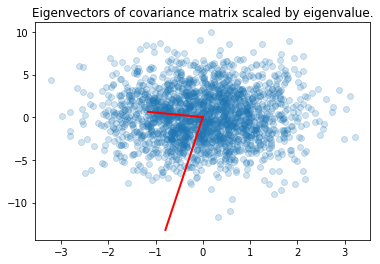

In [7]:
# the original data distribution
plt.scatter(df['x1'], df['x2'], alpha=0.2)

# a scale factor to emphazise the lines 
scale_factor=1

# draw each eigenvector
for li, vi in zip(l, V.T):
    print (li, vi)
    # the line is defined by means of its beginning and its end 
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
#plt.axis([-9,9,-9,9])
plt.title('Eigenvectors of covariance matrix scaled by eigenvalue.');

We can now use the eigenvectors and eigenvalues to rotate the data, i.e. take the eigenvectors as new basis vectors and redefine the data points w.r.t this new basis.

In [8]:
# rotate all the data points accordingly to the new base
df_p = np.dot(df, V.T)

print(df.shape,V.shape)

print(df_p.shape)

print(df_p[:,0])

(2000, 3) (3, 3)
(2000, 3)
[ 1.40939968 -2.74005456  7.09208123 ...  0.35969536  1.41864171
 -3.7666876 ]


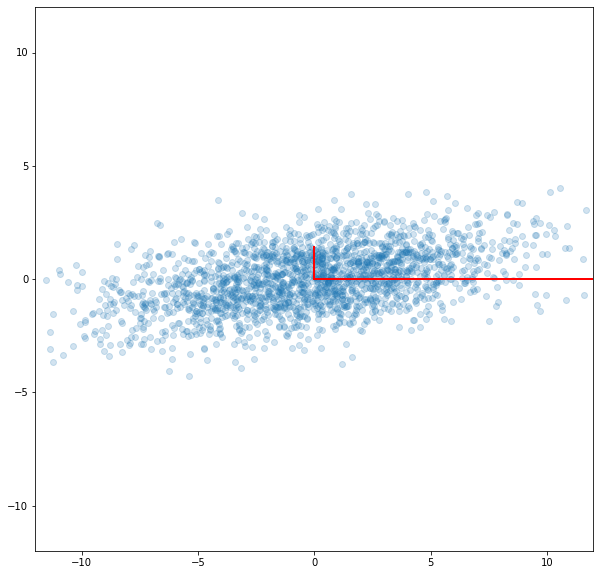

In [9]:
# then plot the rotated dataset and its "axes"
plt.figure(figsize=(10,10))
plt.scatter(df_p[:,0], df_p[:,1], alpha=0.2)

scale_factor=1
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, np.diag([1]*2)):
       plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-12,12,-12,12]);

* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

first row plot original data  

second row plot rotated data

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

change fig size of the subplots

https://stackoverflow.com/questions/14770735/how-do-i-change-the-figure-size-with-subplots

Text(0.5, 1.0, 'x2 vs x3')

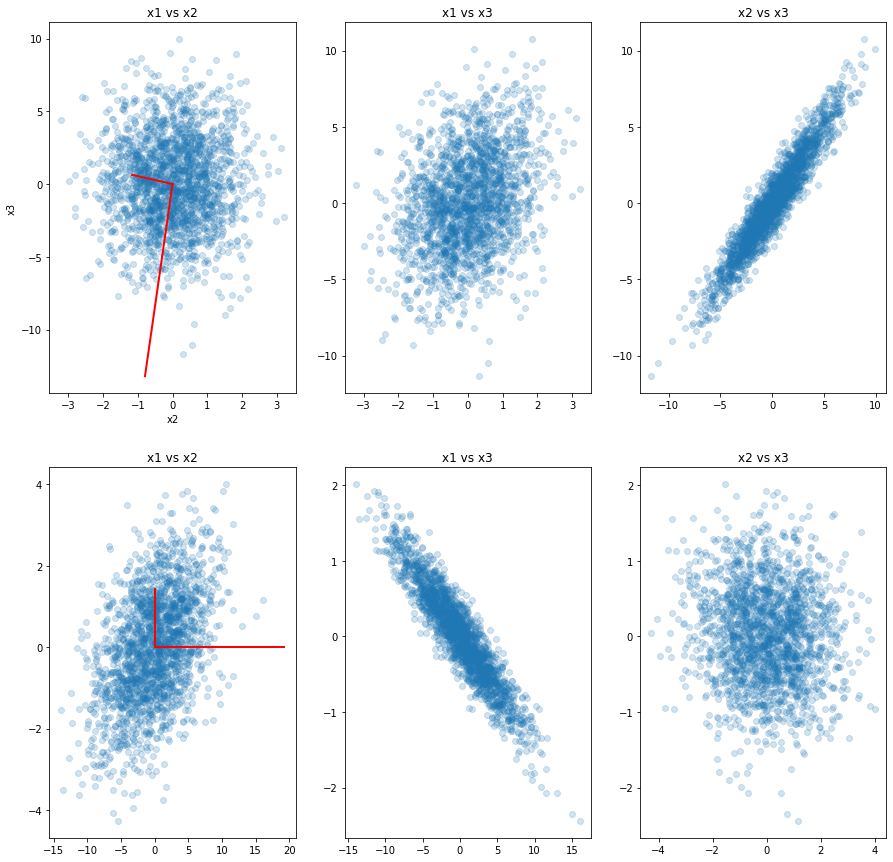

In [10]:
#TO CHECK!!!

fig2, axs = plt.subplots(2, 3, figsize=(15, 15))


axs[0, 0].scatter(df['x1'], df['x2'], alpha=0.2)
axs[0, 0].set_title('x1 vs x2')
axs[0, 0].set(xlabel='x1', ylabel='x2')
scale_factor=1
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, V.T):
       axs[0, 0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
#plt.axis([-12,12,-12,12]);


axs[0, 1].scatter(df['x1'], df['x3'], alpha=0.2)
axs[0, 1].set_title('x1 vs x3')
axs[0, 0].set(xlabel='x1', ylabel='x3')


axs[0, 2].scatter(df['x2'], df['x3'], alpha=0.2)
axs[0, 2].set_title('x2 vs x3')
axs[0, 0].set(xlabel='x2', ylabel='x3')



axs[1, 0].scatter(df_p[:,0], df_p[:,1], alpha=0.2)
axs[1, 0].set_title('x1 vs x2')
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, np.diag([1]*2)):
       axs[1, 0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
#plt.axis([-12,12,-12,12]);



axs[1, 1].scatter(df_p[:,0], df_p[:,2], alpha=0.2)
axs[1, 1].set_title('x1 vs x3')

axs[1, 2].scatter(df_p[:,1], df_p[:,2], alpha=0.2)
axs[1, 2].set_title('x2 vs x3')

    


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [11]:
N=2000 #number of entries


def ten_gaus(N):
    #values for mean and stdev of each normal distribution
    a_mu=0 ; a_sigma=1/50
    b_mu=+0.01 ; b_sigma=1/50
    c_mu=-0.02 ; c_sigma=1/50
    d_mu=+0.03 ; d_sigma=1/50
    e_mu=-0.04 ; e_sigma=1/50
    f_mu=+0.05 ; f_sigma=1/50
    g_mu=-0.06 ; g_sigma=1/50
    h_mu=+0.07 ; h_sigma=1/50
    i_mu=-0.08 ; i_sigma=1/50
    j_mu=0.09 ; j_sigma=1/50
    
    #TODO
    #maybe its more convenient to write a list with parameters...
    val=np.random.normal(a_mu, a_sigma, size=N)+np.random.normal(b_mu, b_sigma, size=N)+np.random.normal(b_mu, b_sigma, size=N)+np.random.normal(d_mu, d_sigma, size=N)+np.random.normal(e_mu, e_sigma, size=N)+np.random.normal(f_mu, f_sigma, size=N)+np.random.normal(g_mu, g_sigma, size=N)+np.random.normal(h_mu, h_sigma, size=N)+np.random.normal(i_mu, i_sigma, size=N)+np.random.normal(j_mu, j_sigma, size=N)
    
    return val


print(ten_gaus(20))



df['x1_n']=df['x1']+ten_gaus(N)
df['x2_n']=df['x2']+ten_gaus(N)
df['x3_n']=df['x3']+ten_gaus(N)

df

[ 0.05324344  0.04295758  0.11753756  0.15258976  0.17862195  0.08936881
  0.05657838  0.12041972  0.08839336  0.09038527  0.05236956  0.02579016
  0.02953078  0.08228089 -0.02755977  0.07393488  0.15861834  0.01210182
  0.03180848  0.02364788]


,x1,x2,x3,x1_n,x2_n,x3_n
0,1.088934,-1.495480,-0.406545,1.076018,-1.388771,-0.421575
1,-0.148163,2.033083,1.884919,-0.144204,2.150728,1.957414
2,0.183393,-5.173368,-4.989975,0.184369,-5.295977,-5.064820
3,-1.179968,2.678894,1.498926,-1.129418,2.728036,1.440838
4,-0.946355,-1.924182,-2.870538,-0.802698,-1.938932,-2.761080
...,...,...,...,...,...,...
1995,-0.189579,-0.562625,-0.752204,-0.102024,-0.468502,-0.613207
1996,0.246977,-0.207531,0.039447,0.218479,-0.130871,0.188387
1997,-0.066353,-0.228786,-0.295139,-0.013020,-0.202570,-0.227053
1998,-1.023468,-0.564051,-1.587520,-1.018621,-0.477988,-1.513221


1) calculate cov matrix


In [12]:
#get the covariance matrix of the dataset
cov_matrix=df.cov()
print('covariance matrix \n',cov_matrix)

#calculate the eigenvalues and eigenvector
#with LINALG scipy library that we included before as "la"
eigen_vals, eigen_vecs = la.eig(cov_matrix)

#for a NxN matrix there are N eigenvalues and N eigenvectors
print ('\n eigenvalues \n',eigen_vals,'\n', type(eigen_vals),eigen_vals.shape)


#each row is an eigenvector
print ('\n eigenvectors \n',eigen_vecs,'\n', type(eigen_vecs),eigen_vals.shape)


covariance matrix 
             x1        x2         x3      x1_n      x2_n       x3_n
x1    0.979785  0.028342   1.008127  0.981181  0.027700   1.009316
x2    0.028342  9.330501   9.358843  0.036467  9.333119   9.353175
x3    1.008127  9.358843  10.366969  1.017648  9.360819  10.362491
x1_n  0.981181  0.036467   1.017648  0.986645  0.035775   1.018688
x2_n  0.027700  9.333119   9.360819  0.035775  9.339723   9.355198
x3_n  1.009316  9.353175  10.362491  1.018688  9.355198  10.361955

 eigenvalues 
 [3.85028987e+01+0.j 2.85468057e+00+0.j 2.31585584e-16+0.j
 4.02712121e-03+0.j 1.92036660e-03+0.j 2.05161699e-03+0.j] 
 <class 'numpy.ndarray'> (6,)

 eigenvectors 
 [[ 2.91239123e-02  5.75803398e-01 -5.77350269e-01  1.85731971e-02
  -4.62203123e-01  3.46831689e-01]
 [ 4.84807148e-01 -3.13281327e-01 -5.77350269e-01 -2.06328505e-02
  -6.93008562e-02 -5.72935583e-01]
 [ 5.13931061e-01  2.62522071e-01  5.77350269e-01 -2.05965338e-03
  -5.31503980e-01 -2.26103895e-01]
 [ 2.95853360e-02  5.771509

Check the variability and reduce

In [13]:
l, V =la.eig(cov_matrix)
Lambda=np.diag(l)
print (Lambda)
print(type(cov_matrix))
print ("CovMatrix trace():", (cov_matrix.values).trace())
print ("Lambda trace():", Lambda.trace())

print("biggest eigenval (element 0,0)",Lambda[0,0])
print('(element 1,1)',Lambda[1,1])
print('(element 2,2)',Lambda[2,2])

sum=(Lambda[0,0])#+Lambda[1,1])

print(sum)
#print(type(Lambda.trace()))
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping only 1st component',variability,'%')

sum=(Lambda[0,0]+Lambda[1,1])
print(sum)
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping 2 components',variability,'%')


[[3.85028987e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 2.85468057e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 2.31585584e-16+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  4.02712121e-03+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 1.92036660e-03+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 2.05161699e-03+0.j]]
<class 'pandas.core.frame.DataFrame'>
CovMatrix trace(): 41.36557841193818
Lambda trace(): (41.36557841193816+0j)
biggest eigenval (element 0,0) (38.502898732855+0j)
(element 1,1) (2.8546805742757133+0j)
(element 2,2) (2.3158558404290375e-16+0j)
(38.502898732855+0j)
variability keepin

In [14]:
# rotate all the data points accordingly to the new base
df_p = np.dot(df, V.T)

print(df.shape,V.shape)

print(df_p.shape)

print(df_p[:,0])

(2000, 6) (6, 6)
(2000, 6)
[-0.0790057  -0.23977585  0.60206359 ...  0.05136775  0.23914033
 -0.45362801]


/home/fedonv/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[Text(0, 0.5, 'x3_n'), Text(0.5, 0, 'x2_n')]

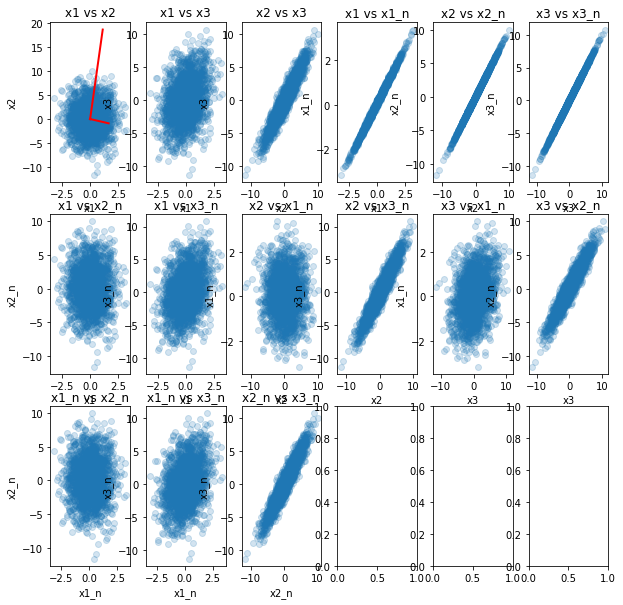

In [15]:
#TO CHECK!!!

fig2, axs = plt.subplots(3, 6, figsize=(10, 10))


axs[0, 0].scatter(df['x1'], df['x2'], alpha=0.2)
axs[0, 0].set_title('x1 vs x2')
axs[0, 0].set(xlabel='x1', ylabel='x2')
scale_factor=1
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, V.T):
       axs[0, 0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
#plt.axis([-12,12,-12,12]);


axs[0, 1].scatter(df['x1'], df['x3'], alpha=0.2)
axs[0, 1].set_title('x1 vs x3')
axs[0, 1].set(xlabel='x1', ylabel='x3')


axs[0, 2].scatter(df['x2'], df['x3'], alpha=0.2)
axs[0, 2].set_title('x2 vs x3')
axs[0, 2].set(xlabel='x2', ylabel='x3')


axs[0, 3].scatter(df['x1'], df['x1_n'], alpha=0.2)
axs[0, 3].set_title('x1 vs x1_n')
axs[0, 3].set(xlabel='x1', ylabel='x1_n')


axs[0, 4].scatter(df['x2'], df['x2_n'], alpha=0.2)
axs[0, 4].set_title('x2 vs x2_n')
axs[0, 4].set(xlabel='x2', ylabel='x2_n')

axs[0, 5].scatter(df['x3'], df['x3_n'], alpha=0.2)
axs[0, 5].set_title('x3 vs x3_n')
axs[0, 5].set(xlabel='x3', ylabel='x3_n')


axs[1, 0].scatter(df['x1'], df['x2_n'], alpha=0.2)
axs[1, 0].set_title('x1 vs x2_n')
axs[1, 0].set(xlabel='x1', ylabel='x2_n')


axs[1, 1].scatter(df['x1'], df['x3_n'], alpha=0.2)
axs[1, 1].set_title('x1 vs x3_n')
axs[1, 1].set(xlabel='x1', ylabel='x3_n')


axs[1, 2].scatter(df['x2'], df['x1_n'], alpha=0.2)
axs[1, 2].set_title('x2 vs x1_n')
axs[1, 2].set(xlabel='x2', ylabel='x1_n')


axs[1, 3].scatter(df['x2'], df['x3_n'], alpha=0.2)
axs[1, 3].set_title('x2 vs x3_n')
axs[1, 3].set(xlabel='x2', ylabel='x3_n')

axs[1, 4].scatter(df['x3'], df['x1_n'], alpha=0.2)
axs[1, 4].set_title('x3 vs x1_n')
axs[1, 4].set(xlabel='x3', ylabel='x1_n')

axs[1, 5].scatter(df['x3'], df['x2_n'], alpha=0.2)
axs[1, 5].set_title('x3 vs x2_n')
axs[1, 5].set(xlabel='x3', ylabel='x2_n')




axs[2, 0].scatter(df['x1_n'], df['x2_n'], alpha=0.2)
axs[2, 0].set_title('x1_n vs x2_n')
axs[2, 0].set(xlabel='x1_n', ylabel='x2_n')


axs[2, 1].scatter(df['x1_n'], df['x3_n'], alpha=0.2)
axs[2, 1].set_title('x1_n vs x3_n')
axs[2, 1].set(xlabel='x1_n', ylabel='x3_n')


axs[2, 2].scatter(df['x2_n'], df['x3_n'], alpha=0.2)
axs[2, 2].set_title('x2_n vs x3_n')
axs[2, 2].set(xlabel='x2_n', ylabel='x3_n')




[Text(0, 0.5, 'x3_n'), Text(0.5, 0, 'x2_n')]

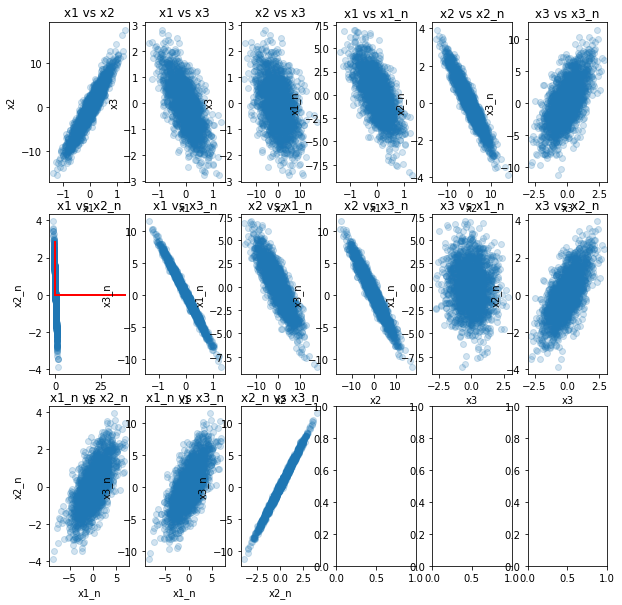

In [16]:
df_p=pd.DataFrame(df_p,columns =['x1','x2','x3','x1_n','x2_n','x3_n'])


fig3, axs = plt.subplots(3, 6, figsize=(10, 10))


axs[0, 0].scatter(df_p['x1'], df_p['x2'], alpha=0.2)
axs[0, 0].set_title('x1 vs x2')
axs[0, 0].set(xlabel='x1', ylabel='x2')
scale_factor=1
for li, vi in zip(l, np.diag([1]*2)):
       axs[1, 0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)


axs[0, 1].scatter(df_p['x1'], df_p['x3'], alpha=0.2)
axs[0, 1].set_title('x1 vs x3')
axs[0, 1].set(xlabel='x1', ylabel='x3')


axs[0, 2].scatter(df_p['x2'], df_p['x3'], alpha=0.2)
axs[0, 2].set_title('x2 vs x3')
axs[0, 2].set(xlabel='x2', ylabel='x3')


axs[0, 3].scatter(df_p['x1'], df_p['x1_n'], alpha=0.2)
axs[0, 3].set_title('x1 vs x1_n')
axs[0, 3].set(xlabel='x1', ylabel='x1_n')


axs[0, 4].scatter(df_p['x2'], df_p['x2_n'], alpha=0.2)
axs[0, 4].set_title('x2 vs x2_n')
axs[0, 4].set(xlabel='x2', ylabel='x2_n')

axs[0, 5].scatter(df_p['x3'], df_p['x3_n'], alpha=0.2)
axs[0, 5].set_title('x3 vs x3_n')
axs[0, 5].set(xlabel='x3', ylabel='x3_n')


axs[1, 0].scatter(df_p['x1'], df_p['x2_n'], alpha=0.2)
axs[1, 0].set_title('x1 vs x2_n')
axs[1, 0].set(xlabel='x1', ylabel='x2_n')


axs[1, 1].scatter(df_p['x1'], df_p['x3_n'], alpha=0.2)
axs[1, 1].set_title('x1 vs x3_n')
axs[1, 1].set(xlabel='x1', ylabel='x3_n')


axs[1, 2].scatter(df_p['x2'], df_p['x1_n'], alpha=0.2)
axs[1, 2].set_title('x2 vs x1_n')
axs[1, 2].set(xlabel='x2', ylabel='x1_n')


axs[1, 3].scatter(df_p['x2'], df_p['x3_n'], alpha=0.2)
axs[1, 3].set_title('x2 vs x3_n')
axs[1, 3].set(xlabel='x2', ylabel='x3_n')

axs[1, 4].scatter(df_p['x3'], df_p['x1_n'], alpha=0.2)
axs[1, 4].set_title('x3 vs x1_n')
axs[1, 4].set(xlabel='x3', ylabel='x1_n')

axs[1, 5].scatter(df_p['x3'], df_p['x2_n'], alpha=0.2)
axs[1, 5].set_title('x3 vs x2_n')
axs[1, 5].set(xlabel='x3', ylabel='x2_n')




axs[2, 0].scatter(df_p['x1_n'], df_p['x2_n'], alpha=0.2)
axs[2, 0].set_title('x1_n vs x2_n')
axs[2, 0].set(xlabel='x1_n', ylabel='x2_n')


axs[2, 1].scatter(df_p['x1_n'], df_p['x3_n'], alpha=0.2)
axs[2, 1].set_title('x1_n vs x3_n')
axs[2, 1].set(xlabel='x1_n', ylabel='x3_n')


axs[2, 2].scatter(df_p['x2_n'], df_p['x3_n'], alpha=0.2)
axs[2, 2].set_title('x2_n vs x3_n')
axs[2, 2].set(xlabel='x2_n', ylabel='x3_n')




3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [17]:
#parameters of the spring (just an harmonic oscillator!)
k=5 #elastic constant
m=1 #mass of the spring
x0=10 #lenght at rest

#parameters of the oscillation
A=2 #amplitude of the oscillation
w=k/m #pulsation
phi0=0 #initial phase

T=2*np.pi*w #period of the oscillation

#dataframe t(s), x(t),y(t),z(t)

n=1000 #number of entries
df_s=pd.DataFrame([i*2*T/n for i in range(n)],columns=['t[s]']) #fill times for 2 periods of oscillation

df_s['x(t)']= df_s.apply(lambda df_s: A*np.cos(w*df_s['t[s]']+phi0) +x0 , axis=1) #calculation of the exact position in x
df_s['y(t)']=np.random.normal(0,1,size=n) #little random gaussian noise
df_s['z(t)']=[0 for i in range(n)] #fixed at 0

df_s

,t[s],x(t),y(t),z(t)
0,0.000000,12.000000,-0.012681,0
1,0.062832,11.902113,0.541182,0
2,0.125664,11.618034,-0.205738,0
3,0.188496,11.175571,1.578177,0
4,0.251327,10.618034,0.577191,0
...,...,...,...,...
995,62.517694,10.000000,-1.552114,0
996,62.580526,10.618034,1.604560,0
997,62.643358,11.175571,-0.084277,0
998,62.706189,11.618034,-0.049990,0


In [18]:
n_cam=4 #number of cameras
phi=[(i+1)*2*np.pi/n_cam for i in range(n_cam)] #angle
theta=[(i+1)*np.pi/n_cam for i in range(n_cam)] #angle
#unitary vector defining axis direction
direction=[[np.cos(phi[i])*np.sin(theta[i]),np.sin(phi[i])*np.sin(theta[i]),np.cos(theta[i])]for i in range(n_cam)]

print(phi, "\n",theta)
print(direction)



[1.5707963267948966, 3.141592653589793, 4.71238898038469, 6.283185307179586] 
 [0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793]
[[4.329780281177466e-17, 0.7071067811865475, 0.7071067811865476], [-1.0, 1.2246467991473532e-16, 6.123233995736766e-17], [-1.29893408435324e-16, -0.7071067811865476, -0.7071067811865475], [1.2246467991473532e-16, -2.999519565323715e-32, -1.0]]


In [19]:
for i in range(n_cam):
    
    txt = "Xcam_{}".format(i)
    xv=direction[i][0]
    yv=direction[i][1]
    zv=direction[i][2]
    df_s[txt]= df_s.apply(lambda df_s: (df_s['x(t)']*xv+df_s['y(t)']*yv+df_s['z(t)']*zv),axis=1)
    
df_s

,t[s],x(t),y(t),z(t),Xcam_0,Xcam_1,Xcam_2,Xcam_3
0,0.000000,12.000000,-0.012681,0,-0.008967,-12.000000,0.008967,1.469576e-15
1,0.062832,11.902113,0.541182,0,0.382673,-11.902113,-0.382673,1.457588e-15
2,0.125664,11.618034,-0.205738,0,-0.145478,-11.618034,0.145478,1.422799e-15
3,0.188496,11.175571,1.578177,0,1.115940,-11.175571,-1.115940,1.368613e-15
4,0.251327,10.618034,0.577191,0,0.408135,-10.618034,-0.408135,1.300334e-15
...,...,...,...,...,...,...,...,...
995,62.517694,10.000000,-1.552114,0,-1.097510,-10.000000,1.097510,1.224647e-15
996,62.580526,10.618034,1.604560,0,1.134595,-10.618034,-1.134595,1.300334e-15
997,62.643358,11.175571,-0.084277,0,-0.059593,-11.175571,0.059593,1.368613e-15
998,62.706189,11.618034,-0.049990,0,-0.035348,-11.618034,0.035348,1.422799e-15


In [20]:
#calculate the covariance matrix with only the columns of interest
cov_matrix=df_s[['Xcam_0','Xcam_1','Xcam_2','Xcam_3']].cov()
print(cov_matrix)

#calculate the eigenvalues and eigenvector
#with LINALG scipy library that we included before as "la"
eigen_vals, eigen_vecs = la.eig(cov_matrix)

#for a NxN matrix there are N eigenvalues and N eigenvectors
print ('\n eigenvalues \n',eigen_vals,'\n', type(eigen_vals),eigen_vals.shape)


#each row is an eigenvector
print ('\n eigenvectors \n',eigen_vecs,'\n', type(eigen_vecs),eigen_vals.shape)

              Xcam_0        Xcam_1        Xcam_2        Xcam_3
Xcam_0  5.153652e-01 -2.910170e-02 -5.153652e-01  3.563930e-18
Xcam_1 -2.910170e-02  2.002002e+00  2.910170e-02 -2.451745e-16
Xcam_2 -5.153652e-01  2.910170e-02  5.153652e-01 -3.563930e-18
Xcam_3  3.563930e-18 -2.451745e-16 -3.563930e-18  3.002522e-32

 eigenvalues 
 [1.02898952e+00+0.j 2.00374280e+00+0.j 0.00000000e+00+0.j
 1.64917001e-16+0.j] 
 <class 'numpy.ndarray'> (4,)

 eigenvectors 
 [[ 7.06475093e-01 -2.98821425e-02 -7.85046229e-17  7.07106781e-01]
 [ 4.22597312e-02  9.99106659e-01  1.22464680e-16 -2.22563377e-16]
 [-7.06475093e-01  2.98821425e-02 -7.85046229e-17  7.07106781e-01]
 [-5.17532446e-18 -1.22355277e-16  1.00000000e+00  2.60502969e-16]] 
 <class 'numpy.ndarray'> (4,)


In [21]:
l, V =la.eig(cov_matrix)
Lambda=np.diag(l)
print (Lambda)
print(type(cov_matrix))
print ("CovMatrix trace():", (cov_matrix.values).trace())
print ("Lambda trace():", Lambda.trace())

print("biggest eigenval (element 0,0)",Lambda[0,0])
print('(element 1,1)',Lambda[1,1])
print('(element 2,2)',Lambda[2,2])
print('(element 3,3)',Lambda[3,3])
sum=(Lambda[0,0])#+Lambda[1,1])

print(sum)
#print(type(Lambda.trace()))
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping only 1st component',variability,'%')

sum=(Lambda[0,0]+Lambda[1,1])
print(sum)
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping 2 components',variability,'%')

[[1.02898952e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 2.00374280e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  1.64917001e-16+0.j]]
<class 'pandas.core.frame.DataFrame'>
CovMatrix trace(): 3.032732316607755
Lambda trace(): (3.0327323166077553+0j)
biggest eigenval (element 0,0) (1.0289895174539958+0j)
(element 1,1) (2.0037427991537595+0j)
(element 2,2) 0j
(element 3,3) (1.6491700112535556e-16+0j)
(1.0289895174539958+0j)
variability keeping only 1st component 33.92945403783496 %
(3.0327323166077553+0j)
variability keeping 2 components 100.0 %


In [22]:
# rotate all the data points accordingly to the new base
df_p = np.dot(df_s[['Xcam_0','Xcam_1','Xcam_2','Xcam_3']], V.T)

print(df_s[['Xcam_0','Xcam_1','Xcam_2','Xcam_3']].shape,V.shape)

print(df_p.shape)

print(df_p)

(1000, 4) (4, 4)
(1000, 4)
[[ 3.52251087e-01 -1.19896588e+01 -3.52251087e-01  8.96652028e-03]
 [ 6.26009752e-01 -1.18753087e+01 -6.26009752e-01 -3.82673242e-01]
 [ 2.44394826e-01 -1.16138030e+01 -2.44394826e-01  1.45478479e-01]
 ...
 [ 2.91849055e-01 -1.11681053e+01 -2.91849055e-01  5.95929509e-02]
 [ 3.22199223e-01 -1.16091489e+01 -3.22199223e-01  3.53480604e-02]
 [ 2.87150095e-01 -1.18955785e+01 -2.87150095e-01  9.69751705e-02]]


/home/fedonv/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[Text(0, 0.5, 'x3'), Text(0.5, 0, 'x2')]

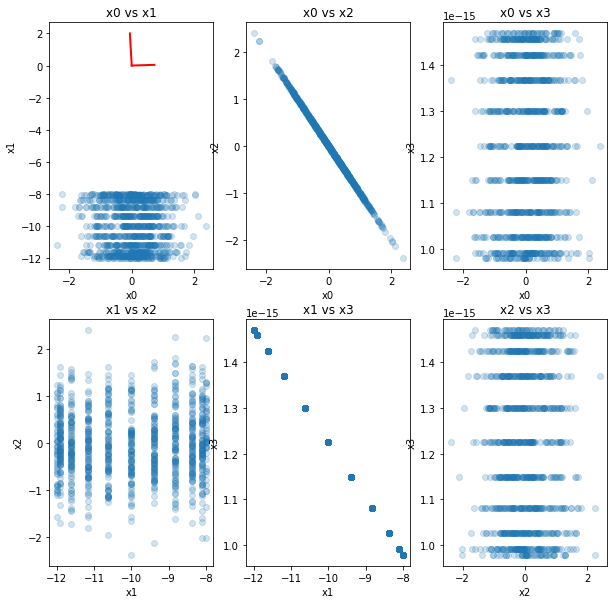

In [23]:
fig2, axs = plt.subplots(2, 3, figsize=(10, 10))

axs[0, 0].scatter(df_s['Xcam_0'], df_s['Xcam_1'], alpha=0.2)
axs[0, 0].set_title('x0 vs x1')
axs[0, 0].set(xlabel='x0', ylabel='x1')
scale_factor=1
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, V.T):
       axs[0, 0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
#plt.axis([-12,12,-12,12]);


axs[0, 1].scatter(df_s['Xcam_0'], df_s['Xcam_2'], alpha=0.2)
axs[0, 1].set_title('x0 vs x2')
axs[0, 1].set(xlabel='x0', ylabel='x2')


axs[0, 2].scatter(df_s['Xcam_0'], df_s['Xcam_3'], alpha=0.2)
axs[0, 2].set_title('x0 vs x3')
axs[0, 2].set(xlabel='x0', ylabel='x3')


axs[1, 0].scatter(df_s['Xcam_1'], df_s['Xcam_2'], alpha=0.2)
axs[1, 0].set_title('x1 vs x2')
axs[1, 0].set(xlabel='x1', ylabel='x2')

axs[1, 1].scatter(df_s['Xcam_1'], df_s['Xcam_3'], alpha=0.2)
axs[1, 1].set_title('x1 vs x3')
axs[1, 1].set(xlabel='x1', ylabel='x3')

axs[1, 2].scatter(df_s['Xcam_2'], df_s['Xcam_3'], alpha=0.2)
axs[1, 2].set_title('x2 vs x3')
axs[1, 2].set(xlabel='x2', ylabel='x3')



4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [24]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2022-12-27 09:25:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 1477391 (1,4M) [application/x-httpd-php]
Salvataggio in: "/home/fedonv/data/magic04.data.2"

magic04.data.2      100%[===================>]   1,41M   226KB/s    in 8,4s    

2022-12-27 09:25:56 (172 KB/s) - "/home/fedonv/data/magic04.data.2" salvato [1477391/1477391]

--2022-12-27 09:25:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Risoluzione di archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connessione a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 5400 (5,3K) [application/x-httpd-php]
Salvataggio in: "/home/fed

In [25]:
df= pd.read_csv("/home/fedonv/data/magic04.data.1",sep=",",header=None) #read the file
df

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [26]:
#calculate the covariance matrix with only the columns of interest
cov_matrix=df.cov()
print(cov_matrix)

#calculate the eigenvalues and eigenvector
#with LINALG scipy library that we included before as "la"
eigen_vals, eigen_vecs = la.eig(cov_matrix)

#for a NxN matrix there are N eigenvalues and N eigenvectors
print ('\n eigenvalues \n',eigen_vals,'\n', type(eigen_vals),eigen_vals.shape)


#each row is an eigenvector
print ('\n eigenvectors \n',eigen_vecs,'\n', type(eigen_vecs),eigen_vals.shape)

             0           1          2         3         4            5  \
0  1794.780934  598.863542  14.064229 -4.886995 -2.800380  -924.434103   
1   598.863542  336.577782   6.221102 -2.045137 -1.178226  -289.972346   
2    14.064229    6.221102   0.223349 -0.073511 -0.042243    -4.473078   
3    -4.886995   -2.045137  -0.073511  0.033421  0.019726     1.215195   
4    -2.800380   -1.178226  -0.042243  0.019726  0.012213     0.655333   
5  -924.434103 -289.972346  -4.473078  1.215195  0.655333  3505.357776   
6  -258.727155 -164.893734   2.293535 -1.136528 -0.669389   827.482747   
7    11.814008   15.186087   0.152121 -0.043003 -0.025239     3.147931   
8    -9.706818   31.636694  -2.302925  1.122738  0.662907   -86.066350   
9  1324.864131  461.786200  15.435467 -4.485661 -2.515795  -914.690722   

             6           7           8            9  
0  -258.727155   11.814008   -9.706818  1324.864131  
1  -164.893734   15.186087   31.636694   461.786200  
2     2.293535    0.152

In [27]:
l, V =la.eig(cov_matrix)
Lambda=np.diag(l)
print (Lambda)
print(type(cov_matrix))
print ("CovMatrix trace():", (cov_matrix.values).trace())
print ("Lambda trace():", Lambda.trace())

print("biggest eigenval (element 0,0)",Lambda[0,0])
print('(element 1,1)',Lambda[1,1])
print('(element 2,2)',Lambda[2,2])
print('(element 3,3)',Lambda[3,3])
sum=(Lambda[0,0])#+Lambda[1,1])

print(sum)
#print(type(Lambda.trace()))
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping only 1st component',variability,'%')

sum=(Lambda[0,0]+Lambda[1,1])
print(sum)
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping 2 components',variability,'%')

sum=(Lambda[0,0]+Lambda[1,1]+Lambda[2,2])
print(sum)
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping 3 components',variability,'%')


sum=(Lambda[0,0]+Lambda[1,1]+Lambda[2,2]+Lambda[3,3])
print(sum)
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping 4 components',variability,'%')

sum=(Lambda[0,0]+Lambda[1,1]+Lambda[2,2]+Lambda[3,3]+Lambda[4,4])
print(sum)
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping 5 components',variability,'%')


sum=(Lambda[0,0]+Lambda[1,1]+Lambda[2,2]+Lambda[3,3]+Lambda[4,4]+Lambda[5,5])
print(sum)
variability=abs(sum*1/Lambda.trace())*100
print ('variability keeping 6 components',variability,'%')


[[6.57979140e+03+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 3.85387048e+03+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 2.01638313e+03+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  1.32675968e+03+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 6.10187259e+02+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
  0.00000000e+00+0.j]
 [0.0

In [28]:
# rotate all the data points accordingly to the new base
df_p = np.dot(df[[0,1,2,3,4,5,6,7,8,9]], V.T)

print(df.shape,V.shape)

print(df_p.shape)

df_p


(19020, 11) (10, 10)
(19020, 10)


array([[  -4.21409025,  -24.16470298,   -5.76737567, ...,   28.19441543,
           0.21368798,  -18.60558951],
       [  -3.77548931,  -25.99796531,   11.17870305, ...,   26.81783937,
           0.81165834,  -22.76826792],
       [ -95.56076419,   37.16554918,   19.43462553, ...,  114.0047119 ,
         -12.42199456,  -84.14806537],
       ...,
       [ -16.73716142,  -50.03076953,    2.66727031, ...,   -8.47296901,
           0.54257115,  -45.34011729],
       [ -81.50880226,   69.16066789,   37.65124127, ...,    2.49165018,
          -7.7199165 ,  -72.71436487],
       [-121.54059739,  130.48205019,  -41.38783428, ..., -172.94554383,
          -3.43717947, -139.01651953]])

[Text(0, 0.5, '9'), Text(0.5, 0, '0')]

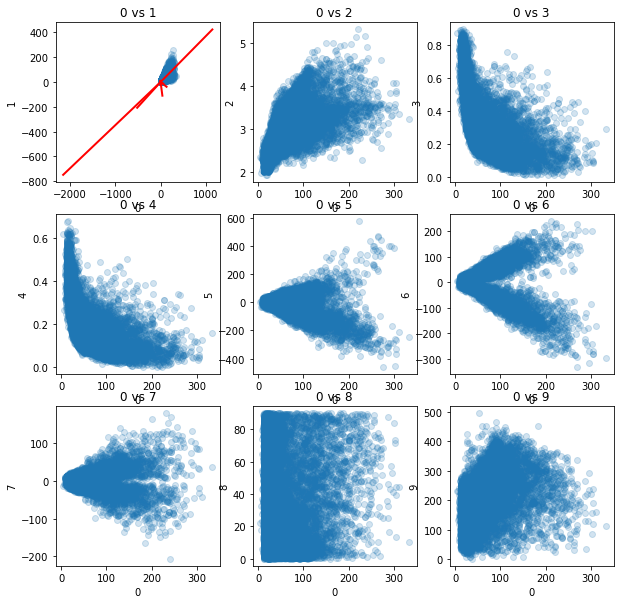

In [34]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))

axs[0, 0].scatter(df[0], df[1], alpha=0.2)
axs[0, 0].set_title('0 vs 1')
axs[0, 0].set(xlabel='0', ylabel='1')
scale_factor=1
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, V.T):
       axs[0, 0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
#plt.axis([-12,12,-12,12]);


axs[0, 1].scatter(df[0], df[2], alpha=0.2)
axs[0, 1].set_title('0 vs 2')
axs[0, 1].set(xlabel='0', ylabel='2')


axs[0, 2].scatter(df[0], df[3], alpha=0.2)
axs[0, 2].set_title('0 vs 3')
axs[0, 2].set(xlabel='0', ylabel='3')


axs[1, 0].scatter(df[0], df[4], alpha=0.2)
axs[1, 0].set_title('0 vs 4')
axs[1, 0].set(xlabel='0', ylabel='4')

axs[1, 1].scatter(df[0], df[5], alpha=0.2)
axs[1, 1].set_title('0 vs 5')
axs[1, 1].set(xlabel='0', ylabel='5')

axs[1, 2].scatter(df[0], df[6], alpha=0.2)
axs[1, 2].set_title('0 vs 6')
axs[1, 2].set(xlabel='0', ylabel='6')

axs[2, 0].scatter(df[0], df[7], alpha=0.2)
axs[2, 0].set_title('0 vs 7')
axs[2, 0].set(xlabel='0', ylabel='7')

axs[2, 1].scatter(df[0], df[8], alpha=0.2)
axs[2, 1].set_title('0 vs 8')
axs[2, 1].set(xlabel='0', ylabel='8')

axs[2, 2].scatter(df[0], df[9], alpha=0.2)
axs[2, 2].set_title('0 vs 9')
axs[2, 2].set(xlabel='0', ylabel='9')

[Text(0, 0.5, '9'), Text(0.5, 0, '1')]

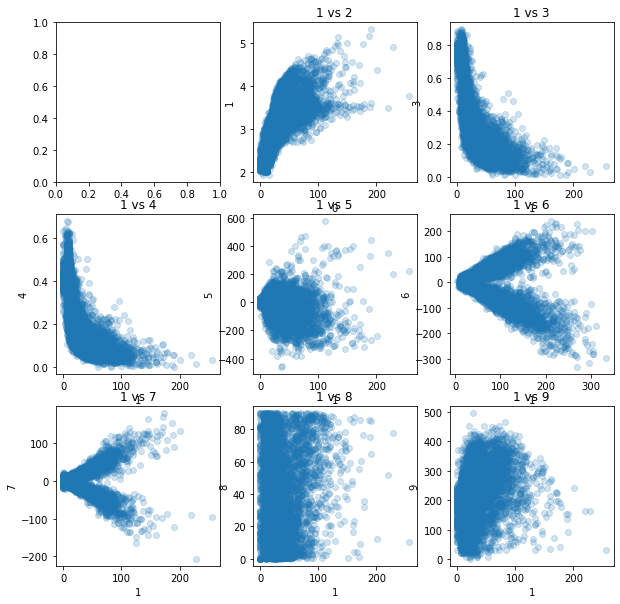

In [36]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))




axs[0, 1].scatter(df[1], df[2], alpha=0.2)
axs[0, 1].set_title('1 vs 2')
axs[0, 1].set(xlabel='0', ylabel='1')


axs[0, 2].scatter(df[1], df[3], alpha=0.2)
axs[0, 2].set_title('1 vs 3')
axs[0, 2].set(xlabel='1', ylabel='3')


axs[1, 0].scatter(df[1], df[4], alpha=0.2)
axs[1, 0].set_title('1 vs 4')
axs[1, 0].set(xlabel='1', ylabel='4')

axs[1, 1].scatter(df[1], df[5], alpha=0.2)
axs[1, 1].set_title('1 vs 5')
axs[1, 1].set(xlabel='1', ylabel='5')

axs[1, 2].scatter(df[0], df[6], alpha=0.2)
axs[1, 2].set_title('1 vs 6')
axs[1, 2].set(xlabel='1', ylabel='6')

axs[2, 0].scatter(df[1], df[7], alpha=0.2)
axs[2, 0].set_title('1 vs 7')
axs[2, 0].set(xlabel='1', ylabel='7')

axs[2, 1].scatter(df[1], df[8], alpha=0.2)
axs[2, 1].set_title('1 vs 8')
axs[2, 1].set(xlabel='1', ylabel='8')

axs[2, 2].scatter(df[1], df[9], alpha=0.2)
axs[2, 2].set_title('1 vs 9')
axs[2, 2].set(xlabel='1', ylabel='9')

[Text(0, 0.5, '9'), Text(0.5, 0, '2')]

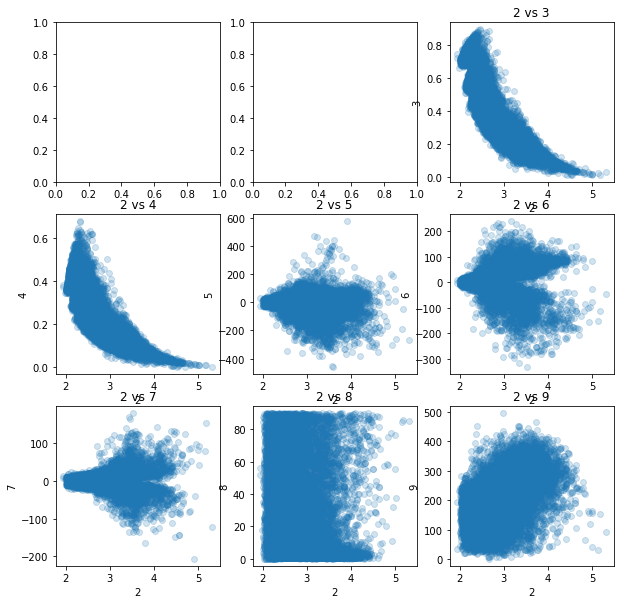

In [37]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))


axs[0, 2].scatter(df[2], df[3], alpha=0.2)
axs[0, 2].set_title('2 vs 3')
axs[0, 2].set(xlabel='2', ylabel='3')


axs[1, 0].scatter(df[2], df[4], alpha=0.2)
axs[1, 0].set_title('2 vs 4')
axs[1, 0].set(xlabel='2', ylabel='4')

axs[1, 1].scatter(df[2], df[5], alpha=0.2)
axs[1, 1].set_title('2 vs 5')
axs[1, 1].set(xlabel='2', ylabel='5')

axs[1, 2].scatter(df[2], df[6], alpha=0.2)
axs[1, 2].set_title('2 vs 6')
axs[1, 2].set(xlabel='2', ylabel='6')

axs[2, 0].scatter(df[2], df[7], alpha=0.2)
axs[2, 0].set_title('2 vs 7')
axs[2, 0].set(xlabel='2', ylabel='7')

axs[2, 1].scatter(df[2], df[8], alpha=0.2)
axs[2, 1].set_title('2 vs 8')
axs[2, 1].set(xlabel='2', ylabel='8')

axs[2, 2].scatter(df[2], df[9], alpha=0.2)
axs[2, 2].set_title('2 vs 9')
axs[2, 2].set(xlabel='2', ylabel='9')

[Text(0, 0.5, '9'), Text(0.5, 0, '3')]

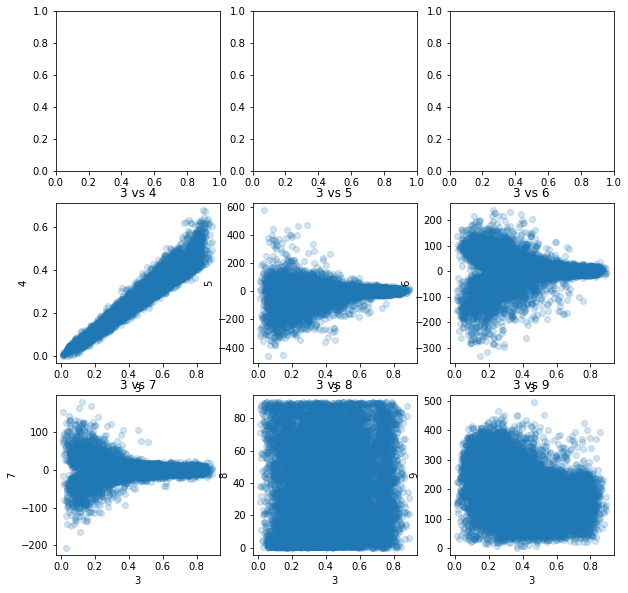

In [38]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))

axs[1, 0].scatter(df[3], df[4], alpha=0.2)
axs[1, 0].set_title('3 vs 4')
axs[1, 0].set(xlabel='3', ylabel='4')

axs[1, 1].scatter(df[3], df[5], alpha=0.2)
axs[1, 1].set_title('3 vs 5')
axs[1, 1].set(xlabel='3', ylabel='5')

axs[1, 2].scatter(df[3], df[6], alpha=0.2)
axs[1, 2].set_title('3 vs 6')
axs[1, 2].set(xlabel='3', ylabel='6')

axs[2, 0].scatter(df[3], df[7], alpha=0.2)
axs[2, 0].set_title('3 vs 7')
axs[2, 0].set(xlabel='3', ylabel='7')

axs[2, 1].scatter(df[3], df[8], alpha=0.2)
axs[2, 1].set_title('3 vs 8')
axs[2, 1].set(xlabel='3', ylabel='8')

axs[2, 2].scatter(df[3], df[9], alpha=0.2)
axs[2, 2].set_title('3 vs 9')
axs[2, 2].set(xlabel='3', ylabel='9')

[Text(0, 0.5, '9'), Text(0.5, 0, '4')]

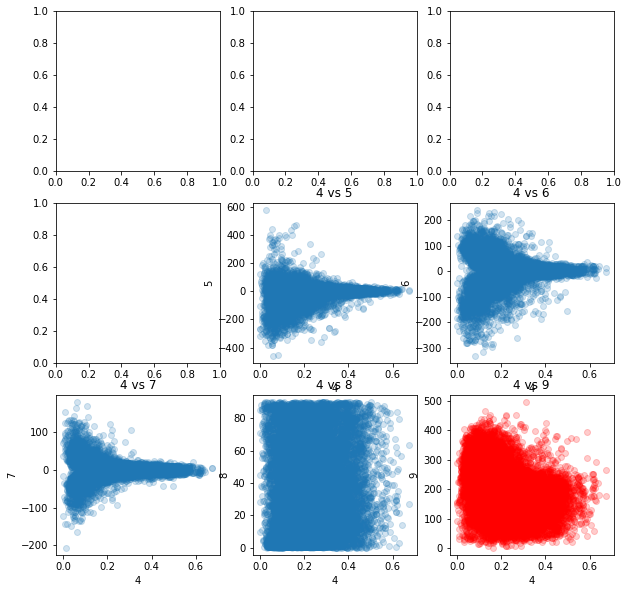

In [43]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))

axs[1, 1].scatter(df[4], df[5], alpha=0.2)
axs[1, 1].set_title('4 vs 5')
axs[1, 1].set(xlabel='4', ylabel='5')

axs[1, 2].scatter(df[4], df[6], alpha=0.2)
axs[1, 2].set_title('4 vs 6')
axs[1, 2].set(xlabel='4', ylabel='6')

axs[2, 0].scatter(df[4], df[7], alpha=0.2)
axs[2, 0].set_title('4 vs 7')
axs[2, 0].set(xlabel='4', ylabel='7')

axs[2, 1].scatter(df[4], df[8], alpha=0.2)
axs[2, 1].set_title('4 vs 8')
axs[2, 1].set(xlabel='4', ylabel='8')

axs[2, 2].scatter(df[4], df[9], alpha=0.2, color='red')
axs[2, 2].set_title('4 vs 9')
axs[2, 2].set(xlabel='4', ylabel='9')

[Text(0, 0.5, '9'), Text(0.5, 0, '5')]

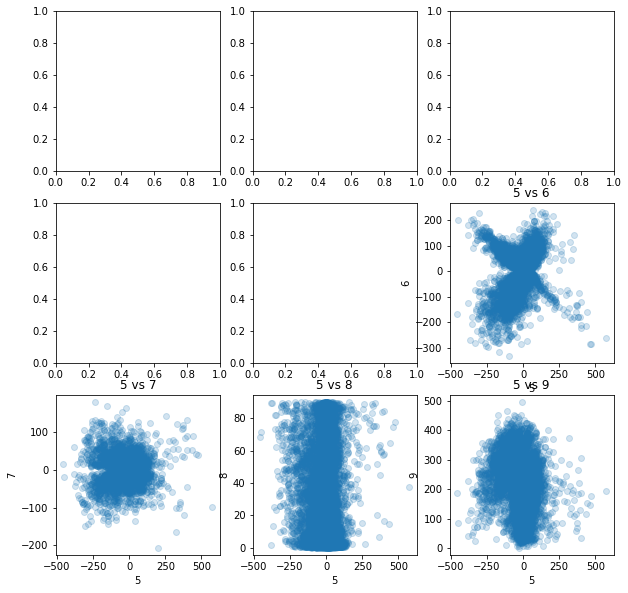

In [40]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))


axs[1, 2].scatter(df[5], df[6], alpha=0.2)
axs[1, 2].set_title('5 vs 6')
axs[1, 2].set(xlabel='5', ylabel='6')

axs[2, 0].scatter(df[5], df[7], alpha=0.2)
axs[2, 0].set_title('5 vs 7')
axs[2, 0].set(xlabel='5', ylabel='7')

axs[2, 1].scatter(df[5], df[8], alpha=0.2)
axs[2, 1].set_title('5 vs 8')
axs[2, 1].set(xlabel='5', ylabel='8')

axs[2, 2].scatter(df[5], df[9], alpha=0.2)
axs[2, 2].set_title('5 vs 9')
axs[2, 2].set(xlabel='5', ylabel='9')

[Text(0, 0.5, '9'), Text(0.5, 0, '6')]

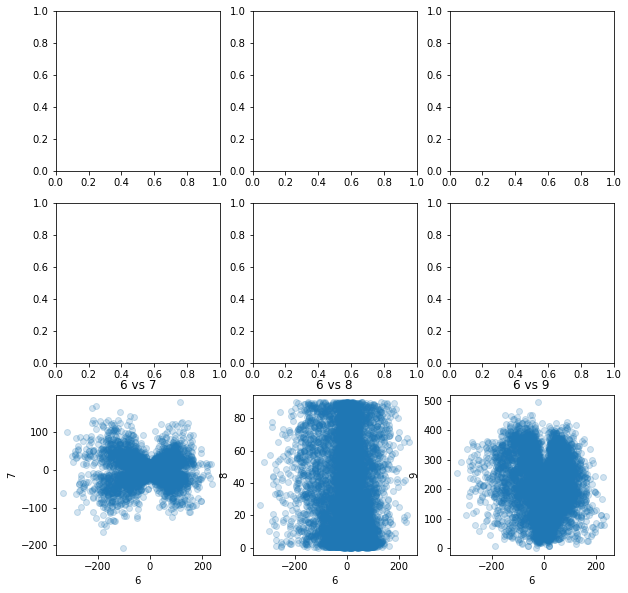

In [44]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))


axs[2, 0].scatter(df[6], df[7], alpha=0.2)
axs[2, 0].set_title('6 vs 7')
axs[2, 0].set(xlabel='6', ylabel='7')

axs[2, 1].scatter(df[6], df[8], alpha=0.2)
axs[2, 1].set_title('6 vs 8')
axs[2, 1].set(xlabel='6', ylabel='8')

axs[2, 2].scatter(df[6], df[9], alpha=0.2)
axs[2, 2].set_title('6 vs 9')
axs[2, 2].set(xlabel='6', ylabel='9')

[Text(0, 0.5, '9'), Text(0.5, 0, '7')]

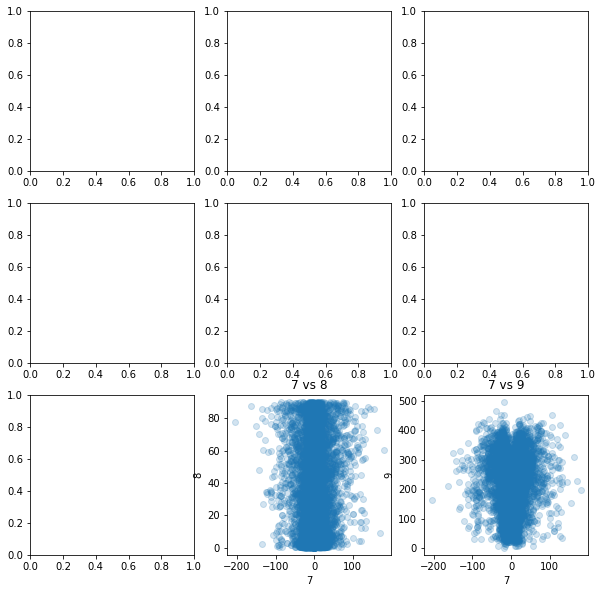

In [45]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))

axs[2, 1].scatter(df[7], df[8], alpha=0.2)
axs[2, 1].set_title('7 vs 8')
axs[2, 1].set(xlabel='7', ylabel='8')

axs[2, 2].scatter(df[7], df[9], alpha=0.2)
axs[2, 2].set_title('7 vs 9')
axs[2, 2].set(xlabel='7', ylabel='9')

[Text(0, 0.5, '9'), Text(0.5, 0, '8')]

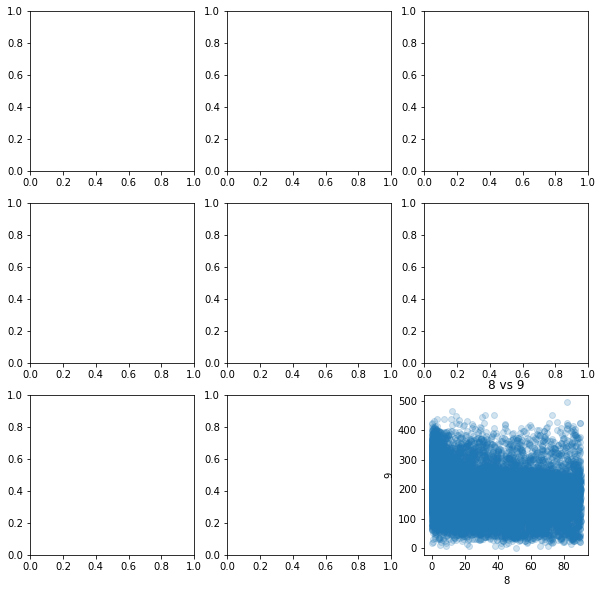

In [46]:
fig2, axs = plt.subplots(3, 3, figsize=(10, 10))

axs[2, 2].scatter(df[8], df[9], alpha=0.2)
axs[2, 2].set_title('8 vs 9')
axs[2, 2].set(xlabel='8', ylabel='9')